# LetsGrowMore Virtual Internship Program ( March 2022 - April 2022 )
# Submitted by - Muskan Gupta 
# Task 1 - Iris Flower Classification ML Project (BEGINNER LEVEL TASK)

The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Using this dataset, we have to train and predict the flower species based on the features needed. For these Classification, we use K Nearest Neighbours ( KNN ) Algorithm.


Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

Importing the dataset

In [2]:
df=pd.read_csv(r"C:\Users\hp\Documents\Tasks\LGMVIP-main\Iris.csv")
df.head(15)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Checking the size of the dataset

In [3]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))


The dataset has 150 rows and 5 columns


Staistical Description of the Data

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking the data if there are any null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


CHECKING FOR MISSING VALUES</h3>

In [6]:
df.isnull().sum()


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Data Visualization   


Plotting Box Plots to check for outliers

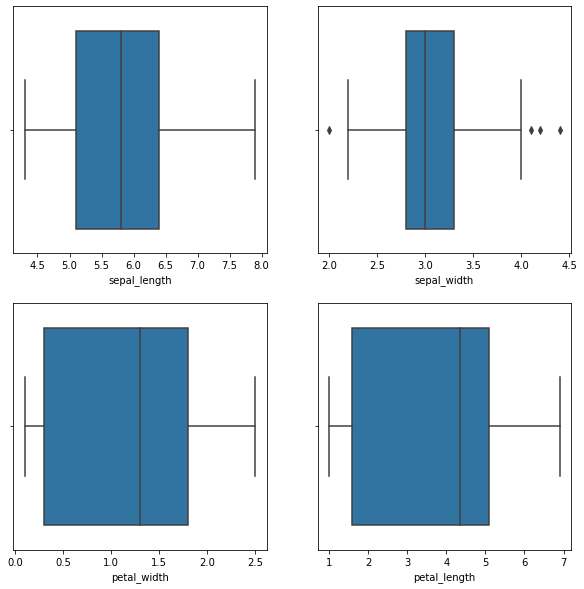

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(x=df["sepal_length"])

plt.subplot(2,2,2)
sns.boxplot(x=df["sepal_width"])

plt.subplot(2,2,3)
sns.boxplot(x=df["petal_width"])

plt.subplot(2,2,4)
sns.boxplot(x=df["petal_length"])
plt.show()

Handling the outliers 

In [8]:
print(df['sepal_width'].quantile(0.50)) 
print(df['sepal_width'].quantile(0.95)) 

3.0
3.8


In [9]:
df['sepal_width'] = np.where(df['sepal_width'] >3.8,3, df['sepal_width'])

<AxesSubplot:xlabel='sepal_width'>

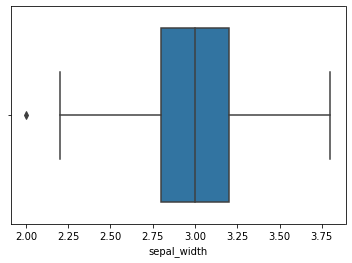

In [10]:
sns.boxplot(x=df["sepal_width"])

DATA VISUALIZATION

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


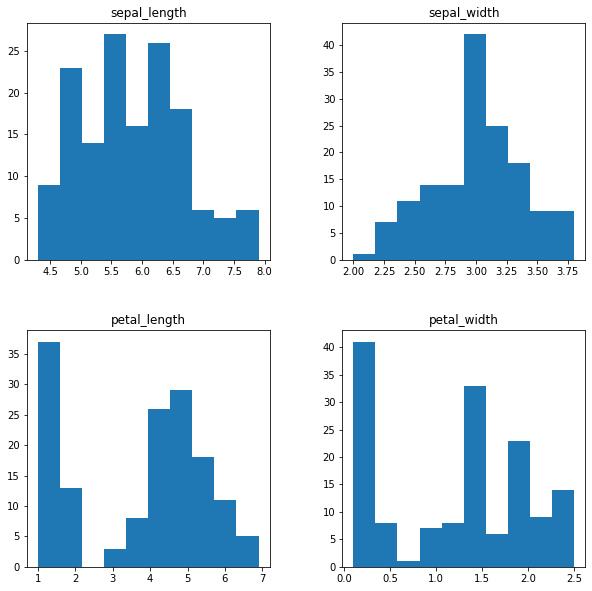

In [11]:
df.hist(figsize=(10,10),grid= False)
plt.show()

<Figure size 720x720 with 0 Axes>

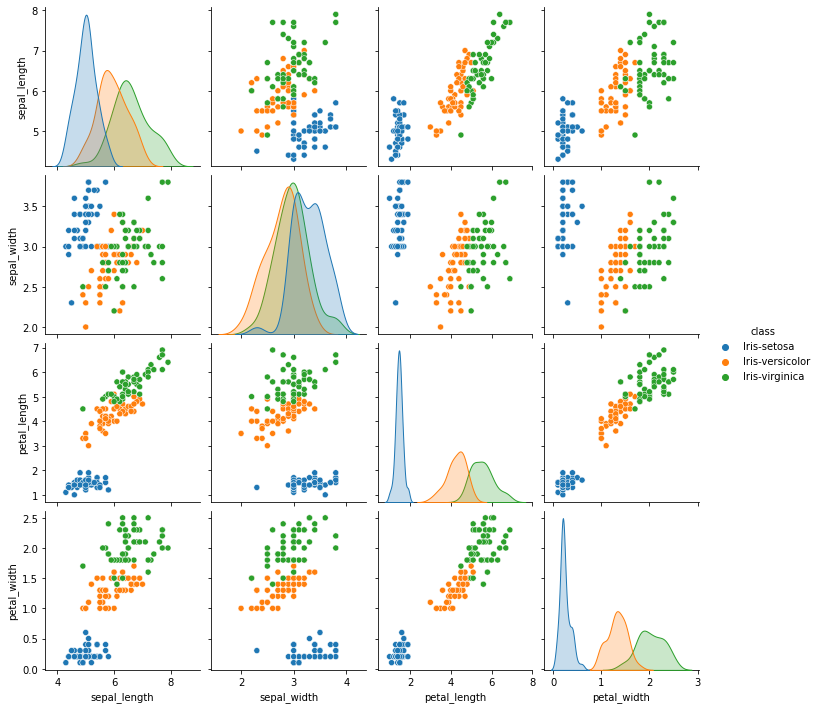

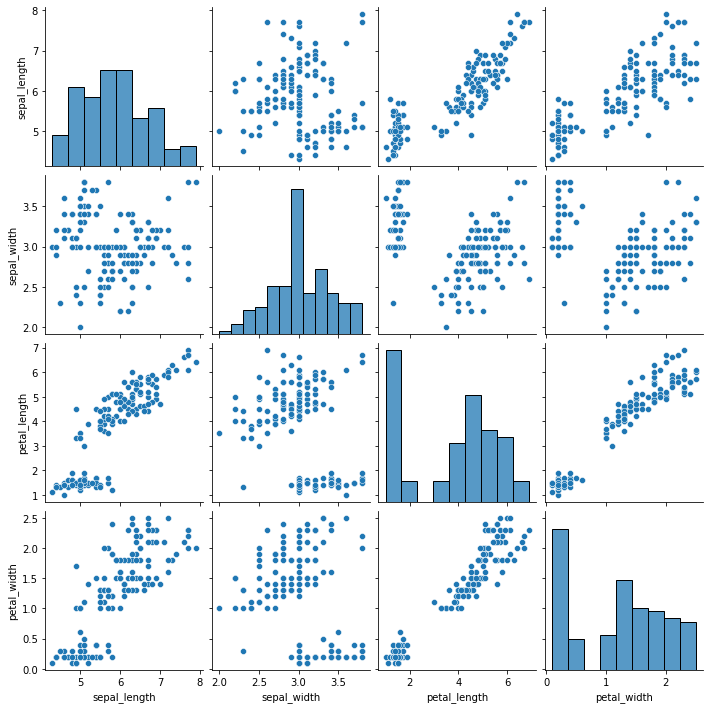

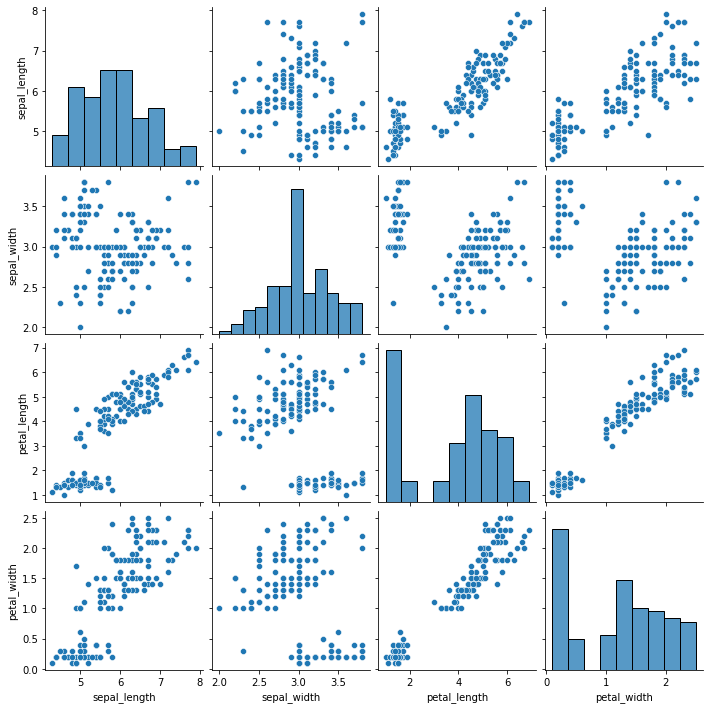

In [12]:
plt.figure(figsize=(10,10));
sns.pairplot(df,hue="class");
sns.pairplot(data=df.drop(columns=['class']))
sns.pairplot(data=df)


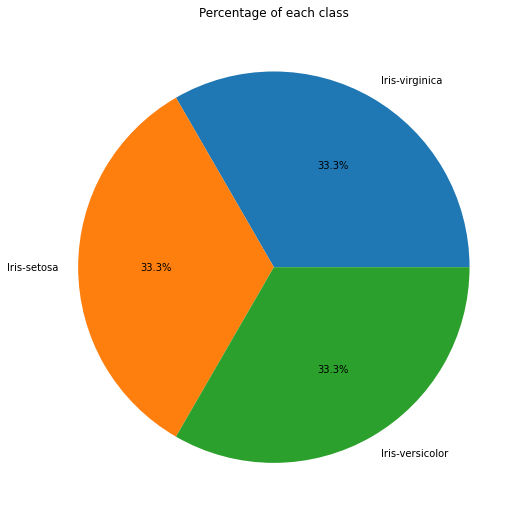

In [13]:
plt.figure(figsize=(9,9))
plt.pie(df["class"].value_counts(),labels=df["class"].value_counts().index,autopct='%1.1f%%')
plt.title("Percentage of each class")
plt.show()

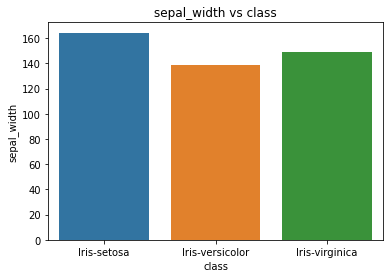

In [14]:
sns.barplot( x='class', y='sepal_width', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_width vs class ")
plt.show()


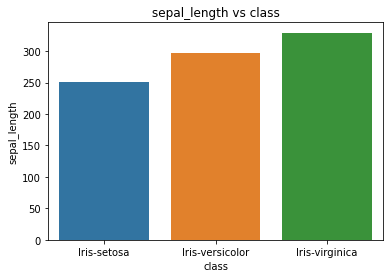

In [15]:
sns.barplot( x='class', y='sepal_length', estimator = np.sum, data=df, ci=None)
plt.title(" sepal_length vs class ")
plt.show()


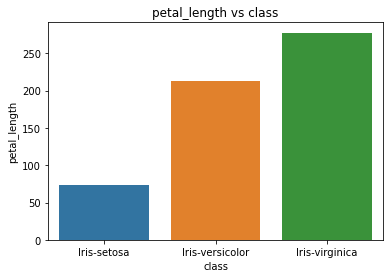

In [16]:
sns.barplot( x='class', y='petal_length', estimator = np.sum, data=df, ci=None)
plt.title("petal_length vs class")
plt.show()

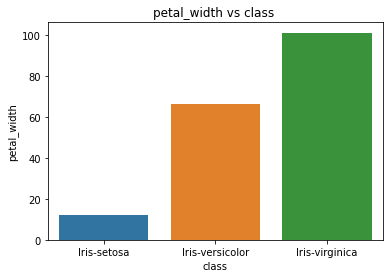

In [17]:
sns.barplot( x='class', y='petal_width', estimator = np.sum, data=df, ci=None)
plt.title("petal_width vs class ")
plt.show()

CORRELATION

In [18]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.079267,0.871754,0.817954
sepal_width,-0.079267,1.000000,-0.331077,-0.270844
petal_length,0.871754,-0.331077,1.000000,0.962757
petal_width,0.817954,-0.270844,0.962757,1.000000


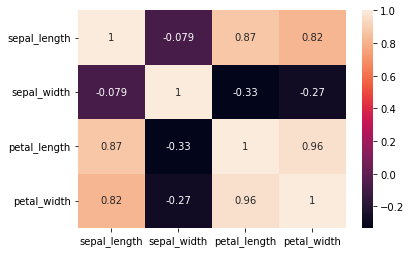

In [19]:
sns.heatmap(corr, annot=True);

MODEL BUILDING

LABEL ENCODING

In [20]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['class']=l.fit_transform(df['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


SPLITTING DATA INTO TRAINING AND TESTING

In [21]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["class"])
Y=df["class"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

MODEL TRAINING AND TESTING

LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 95.55555555555556


K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)


The accuracy of the model is : 95.55555555555556


DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 97.77777777777777


RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

print("The accuracy of the model is :",model.score(x_test,y_test)*100)

The accuracy of the model is : 93.33333333333333


CONCLUSIONS

The accuracy of the classification model using K Nearest Neighbours ( KNN ) Algorithm is 97.7%.